In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import power_transform,LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import random

In [105]:
data=pd.read_csv("2022_Flights.csv")

In [106]:
data[data["Unnamed: 0"]>=53].head(5)

,Unnamed: 0,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,OriginCityName,DestCityName,DepDelay,ArrDelay,Cancelled,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
53,53,1,1,6,4,2022-01-06,DL,"Atlanta, GA","Norfolk, VA",-2.0,NaN,0.0,1.0,NaN,516.0,NaN,NaN,NaN,NaN,NaN
54,54,1,1,6,4,2022-01-06,DL,"Raleigh/Durham, NC","New York, NY",-7.0,-7.0,0.0,0.0,62.0,431.0,NaN,NaN,NaN,NaN,NaN
55,55,1,1,6,4,2022-01-06,DL,"Fort Lauderdale, FL","New York, NY",10.0,-23.0,0.0,0.0,122.0,1069.0,NaN,NaN,NaN,NaN,NaN
56,56,1,1,6,4,2022-01-06,DL,"Atlanta, GA","Orlando, FL",-4.0,8.0,0.0,0.0,66.0,404.0,NaN,NaN,NaN,NaN,NaN
57,57,1,1,6,4,2022-01-06,DL,"Las Vegas, NV","Salt Lake City, UT",-4.0,-5.0,0.0,0.0,52.0,368.0,NaN,NaN,NaN,NaN,NaN


In [107]:
data.isna().sum()

Unnamed: 0                         0
Quarter                            0
Month                              0
DayofMonth                         0
DayOfWeek                          0
FlightDate                         0
Marketing_Airline_Network          0
OriginCityName                     0
DestCityName                       0
DepDelay                      185852
ArrDelay                      206702
Cancelled                          0
Diverted                           0
AirTime                       206702
Distance                           0
CarrierDelay                 5587203
WeatherDelay                 5587203
NASDelay                     5587203
SecurityDelay                5587203
LateAircraftDelay            5587203
dtype: int64

In [108]:
data[["DepDelay","ArrDelay","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]=data[["DepDelay","ArrDelay","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]].fillna(0)
data["TotDelay"]=data[["DepDelay","ArrDelay","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]].sum(axis=1)
data.drop(data[data["Cancelled"]==1].index,inplace=True)

In [109]:
data.isna().sum()

Unnamed: 0                       0
Quarter                          0
Month                            0
DayofMonth                       0
DayOfWeek                        0
FlightDate                       0
Marketing_Airline_Network        0
OriginCityName                   0
DestCityName                     0
DepDelay                         0
ArrDelay                         0
Cancelled                        0
Diverted                         0
AirTime                      16664
Distance                         0
CarrierDelay                     0
WeatherDelay                     0
NASDelay                         0
SecurityDelay                    0
LateAircraftDelay                0
TotDelay                         0
dtype: int64

<Axes: xlabel='Distance', ylabel='AirTime'>

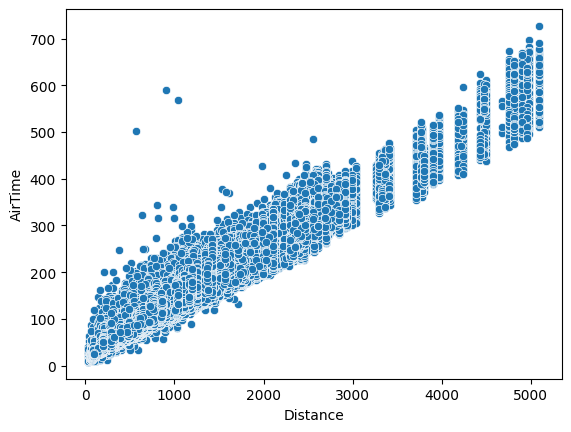

In [110]:
sns.scatterplot(data=data[~data["AirTime"].isna()],x="Distance",y="AirTime")

In [111]:
temp_data=data[~data["AirTime"].isna()]
X_train, X_test, y_train, y_test=train_test_split(temp_data["Distance"],temp_data["AirTime"],test_size=0.2)
lr=LinearRegression()
lr.fit(np.array(X_train).reshape(-1, 1),y_train)
y=lr.predict(np.array(X_test).reshape(-1, 1))
print(lr.score(np.array(X_test).reshape(-1, 1),y_test))


0.9712077013905213


In [112]:
index=data[data["AirTime"].isna()]["Distance"].index
y=lr.predict(np.array(data[data["AirTime"].isna()]["Distance"]).reshape(-1, 1))
data.loc[index,"AirTime"]=np.round(y,0)

In [113]:
data.isna().sum()

Unnamed: 0                   0
Quarter                      0
Month                        0
DayofMonth                   0
DayOfWeek                    0
FlightDate                   0
Marketing_Airline_Network    0
OriginCityName               0
DestCityName                 0
DepDelay                     0
ArrDelay                     0
Cancelled                    0
Diverted                     0
AirTime                      0
Distance                     0
CarrierDelay                 0
WeatherDelay                 0
NASDelay                     0
SecurityDelay                0
LateAircraftDelay            0
TotDelay                     0
dtype: int64

In [114]:
Marketing_Airline_Network_label=data["Marketing_Airline_Network"]
lenc=LabelEncoder()
data["Marketing_Airline_Network_encode"]=lenc.fit_transform(data["Marketing_Airline_Network"])


In [115]:
columns=pd.DataFrame()
columns[["city","state"]]=data["OriginCityName"].str.split(',',expand=True)
lenc_city_org=LabelEncoder()
data["city_org"]=lenc_city_org.fit_transform(columns["city"])
lenc_state_org=LabelEncoder()
data["state_org"]=lenc_state_org.fit_transform(columns["state"])

In [116]:
columns=pd.DataFrame()
columns[["city","state"]]=data["DestCityName"].str.split(',',expand=True)
lenc_city_des=LabelEncoder()
data["city_des"]=lenc_city_des.fit_transform(columns["city"])
lenc_state_des=LabelEncoder()
data["state_des"]=lenc_state_des.fit_transform(columns["state"])

<Axes: xlabel='TotDelay', ylabel='Count'>

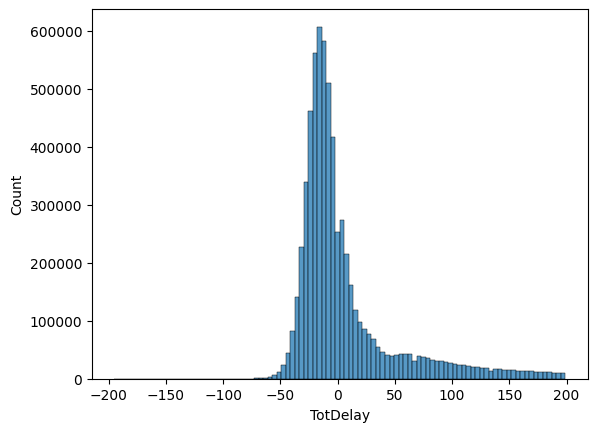

In [117]:
sns.histplot(data=data[data["TotDelay"]<200]["TotDelay"],bins=100)

In [135]:
count_neg=data[data["TotDelay"]<-50]["TotDelay"].count()
count_pos=data[data["TotDelay"]>245]["TotDelay"].count()

tot_count=data["TotDelay"].count()
(count_neg+count_pos)/tot_count
data.drop(data[(data["TotDelay"]>245)&(data["TotDelay"]>-50)].index,inplace=True)

In [73]:
def bins_creator(column):
    min=column.min()
    max=column.max()
    bins=np.linspace(min,max,num=100)
    labels=[f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    new_column=pd.cut(column,bins=bins,labels=labels)
    lenc_column_des=LabelEncoder()
    return lenc_column_des.fit_transform(new_column)
delay_columns=[col for col in data.columns if "Delay" in col]
for column in delay_columns:
    name=f"{column}_labeled"
    data[name]=bins_creator(data[column])

In [74]:
orginal_data=data[:]
orginal_data.columns
data.drop(columns=["FlightDate","Marketing_Airline_Network","OriginCityName","DestCityName","Cancelled"]+delay_columns,inplace=True)

<Axes: xlabel='TotDelay', ylabel='Count'>

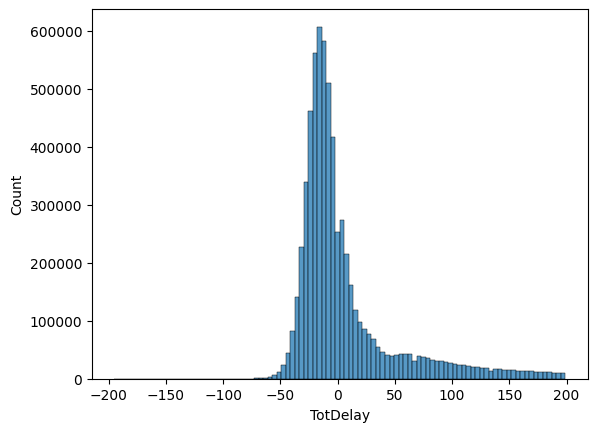

In [ ]:
orginal_data["TotDelay_labeled"].value_counts().count()
sns.histplot(data=orginal_data[orginal_data["TotDelay"]<200]["TotDelay"],bins=100)

In [82]:
orginal_data["states:from_to"]=orginal_data["state_org"].astype(str)+"_"+orginal_data["state_des"].astype(str)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_34152\4178727440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orginal_data["states:from_to"]=orginal_data["state_org"].astype(str)+"_"+orginal_data["state_des"].astype(str)


C:\Users\ahmad\AppData\Local\Temp\ipykernel_34152\275338968.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(grouped.index, rotation=45, ha="right")


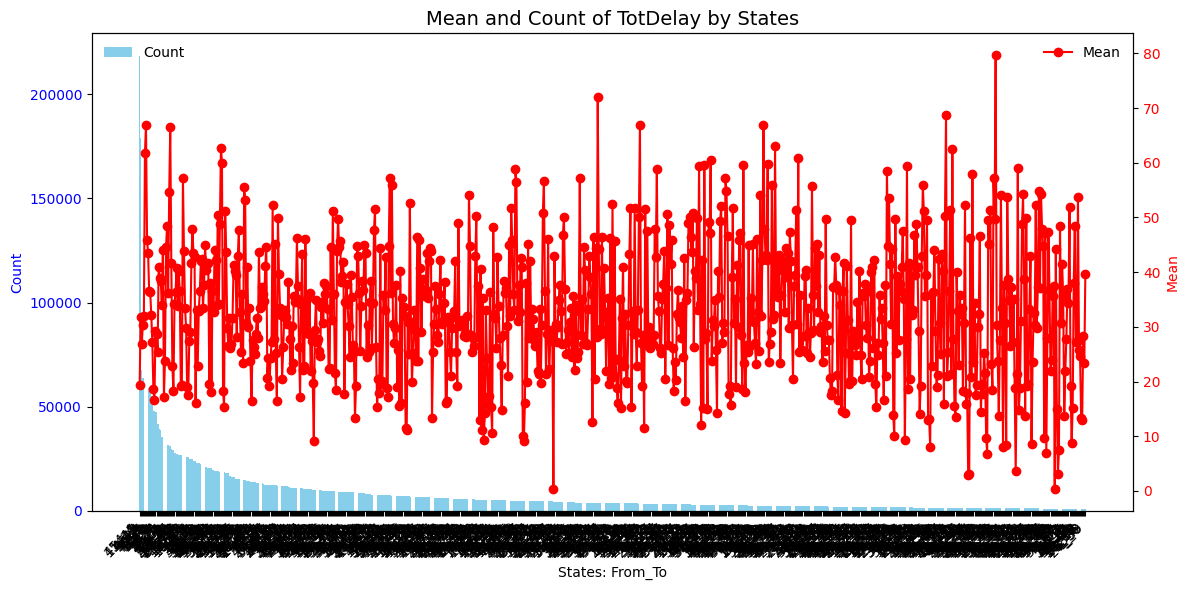

In [103]:
grouped = (
    orginal_data.groupby("states:from_to")["TotDelay"]
    .agg(["mean", "count"])
    .sort_values("count", ascending=False)
)
grouped=grouped[grouped["count"]>1000]
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for 'count'
bars = ax1.bar(grouped.index, grouped["count"], color="skyblue", label="Count")
ax1.set_ylabel("Count", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xlabel("States: From_To")
ax1.set_xticklabels(grouped.index, rotation=45, ha="right")

# Line plot for 'mean' on secondary y-axis
ax2 = ax1.twinx()
line = ax2.plot(grouped.index, grouped["mean"], color="red", marker="o", label="Mean")
ax2.set_ylabel("Mean", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Add legends
bars_label = ax1.legend(loc="upper left", frameon=False)
line_label = ax2.legend(loc="upper right", frameon=False)

# Title
plt.title("Mean and Count of TotDelay by States", fontsize=14)
plt.tight_layout()
plt.show()

In [248]:
data["TotDelay_labeled"].value_counts()

TotDelay_labeled
0     6512791
10     261857
21      31605
2        6542
5        2919
7        2470
9        2311
11       1506
12        752
13        328
14        180
15         89
16         43
17         23
18         18
22          8
19          6
23          5
25          4
20          3
24          3
3           1
8           1
4           1
6           1
27          1
1           1
26          1
Name: count, dtype: int64

In [249]:
y_data=data["TotDelay_labeled"]
x_data=data.drop(columns="TotDelay_labeled")
X_train, X_test, y_train, y_test=train_test_split(x_data,y_data,test_size=0.2)
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)

0.9772285948351792

In [250]:
row_num=random.randint(0,len(data))
row=pd.DataFrame(data.iloc[row_num]).transpose()
y=row["TotDelay_labeled"]
x=row.drop(columns="TotDelay_labeled")
ypred=dtree.predict(x)
sc=dtree.score(x,y)
print("row=",row_num,"y=",y.values,"  ","ypred=",ypred,"    ","score=",sc)

row= 5989157 y= [0.]    ypred= [0]      score= 1.0


In [251]:
data["TotDelay_labeled"].value_counts()

TotDelay_labeled
0     6512791
10     261857
21      31605
2        6542
5        2919
7        2470
9        2311
11       1506
12        752
13        328
14        180
15         89
16         43
17         23
18         18
22          8
19          6
23          5
25          4
20          3
24          3
3           1
8           1
4           1
6           1
27          1
1           1
26          1
Name: count, dtype: int64

In [252]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

C:\Users\ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9542410239951227